In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

C:\Users\Francesco\AppData\Local\Temp\ipykernel_19768\3712812758.py:34: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Francesco\AppData\Local\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


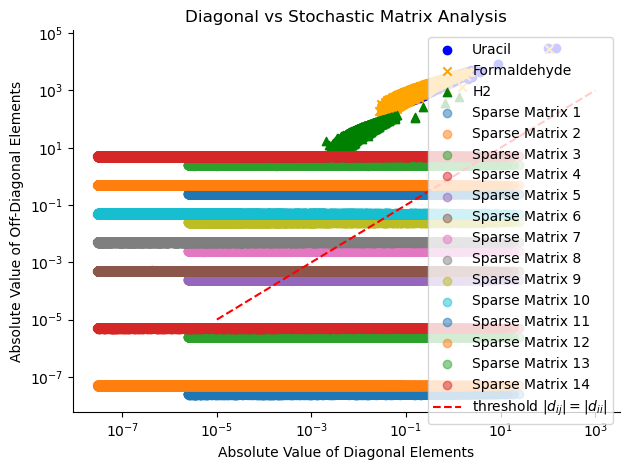

In [4]:
def read_diagonal_analysis(file):
    with open(file, 'r') as f:
        lines = f.readlines()
    data = []
    for line in lines:
        if line.strip():  # Check if the line is not empty
            parts = line.split()
            data.append([float(part) for part in parts])
    return np.array(data)

folder = "diagonalization_data/"

uracile = read_diagonal_analysis(folder + "diagonal_dominance_matrix_uracil.txt")
formaldehyde = read_diagonal_analysis(folder + "diagonal_dominance_matrix_formaldehyde.txt")
H2 = read_diagonal_analysis(folder + "diagonal_dominance_matrix_H2.txt")

numbers = list(range(1, 15))
sparse_matrices = [read_diagonal_analysis(folder + f"diagonal_dominance_sparse_matrix_{i}.txt") for i in numbers]

plt.figure()
plt.scatter(uracile[:, 0], uracile[:, 1], label='Uracil', color='blue', marker='o')
plt.scatter(formaldehyde[:, 0], formaldehyde[:, 1], label='Formaldehyde', color='orange', marker='x')
plt.scatter(H2[:, 0], H2[:, 1], label='H2', color='green', marker='^')
for i, data in zip(numbers, sparse_matrices):
    plt.scatter(data[:, 0], data[:, 1], label=f'Sparse Matrix {i}', alpha=0.5)
plt.xlabel('Absolute Value of Diagonal Elements')
plt.ylabel('Absolute Value of Off-Diagonal Elements')
plt.plot([0.00001, 1000], [0.00001, 1000], color='red', linestyle='--', label='threshold $|d_{ij}| = |d_{ii}|$')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.title('Diagonal vs Stochastic Matrix Analysis')
sns.despine()
plt.tight_layout()
plt.show()